<a href="https://colab.research.google.com/github/Romario1975/Yandex_practicum_DS_projects/blob/main/%D0%A1%D0%94%D0%A3_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На основании данных за 2022 - 2024гг. о мерах поддержки граждан, нуждающихся в долговременном уходе найти зависимость между долей получивших помощь в рамках СДУ из числа нуждающихся и численностью проживающих в данном Субъекте РФ. Выявить тенеденции к изменению динамики, а также сделать сравнительный анализ по годам.

1. Устанавливаем необходимые библиотеки

In [3]:
import numpy as np
import pandas as pd

In [10]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

2. Скачиваем сводный файл

In [6]:
df = pd.read_excel('/content/СДУ.xlsx')

3. Изучаем данные. Смотрим есть ли дубликаты, пропуски значений, а также размер и формат файла.

In [7]:
def data_info(df):
    display(df.head())
    display(df.info())
    display('Количество дубликатов строк', df.duplicated().sum())
    display('Количество пропусков в данных по столбцам', df.isna().sum())
    display('Оценка непрерывных данных', df.describe())
    display('Название столбцов', df.columns)
    display('Количесвто столбцов', df.shape[1])
    display('Количество строк', df.shape[0])

In [8]:
data_info (df)

,Субъект РФ,Нуждающииеся в долговременном уходе на 1.04. 2024,Получающие СДУ 1.04.2024,Доля получающих СДУ из числа нуждающихся на 1.04.2024,Получающие СДУ на дому 1.04.2024,Нуждающиеся в долговременном уходе на 1.01.2024,"Численность граждан, получающих социальные услуги по уходу на 1.01.2024","Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %",Получающие СДУ на дому 1.01.2024,Нуждающииеся в долговременном уходе на 1.01. 2023,Получающие СДУ 1.01.2023,"Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %",Нуждающииеся в долговременном уходе на 1.01. 2022,Получающие СДУ 1.01.2022,"Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %",Получающие СДУ на дому на 01.01.2022,Численность на 01.01.2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Москва,94635.0,80606.0,0.851757,64945.0,97341.0,80564.0,0.827647,65313.0,105507.0,80753.0,0.765380,114308.0,59572.0,0.521153,52828.0,13104177.0
2,Республика Мордовия,9234.0,4320.0,0.467836,3600.0,18204.0,4320.0,0.237310,3600.0,18303.0,4320.0,0.236027,18173.0,4283.0,0.235679,3411.0,771373.0
3,Тульская область,14865.0,5649.0,0.380020,4363.0,14782.0,5622.0,0.380327,4427.0,14731.0,5565.0,0.377775,11976.0,5644.0,0.471276,4404.0,1481471.0
4,Чукотский автономный округ,271.0,100.0,0.369004,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47840.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 17 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Субъект РФ                                                               89 non-null     object 
 1   Нуждающииеся в долговременном уходе на 1.04. 2024                        90 non-null     float64
 2   Получающие СДУ 1.04.2024                                                 90 non-null     float64
 3   Доля получающих СДУ из числа нуждающихся на 1.04.2024                    90 non-null     float64
 4   Получающие СДУ на дому 1.04.2024                                         90 non-null     float64
 5   Нуждающиеся в долговременном уходе на 1.01.2024                          35 non-null     float64
 6   Численность граждан, получающих социальные услуги по уходу на 1.01.2024  35 

None

'Количество дубликатов строк'

2

'Количество пропусков в данных по столбцам'

Субъект РФ                                                                  4
Нуждающииеся в долговременном уходе на 1.04. 2024                           3
Получающие СДУ 1.04.2024                                                    3
Доля получающих СДУ из числа нуждающихся на 1.04.2024                       3
Получающие СДУ на дому 1.04.2024                                            3
Нуждающиеся в долговременном уходе на 1.01.2024                            58
Численность граждан, получающих социальные услуги по уходу на 1.01.2024    58
Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %                59
Получающие СДУ на дому 1.01.2024                                           58
Нуждающииеся в долговременном уходе на 1.01. 2023                          58
Получающие СДУ 1.01.2023                                                   58
Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %                59
Нуждающииеся в долговременном уходе на 1.01. 2022               

'Оценка непрерывных данных'

,Нуждающииеся в долговременном уходе на 1.04. 2024,Получающие СДУ 1.04.2024,Доля получающих СДУ из числа нуждающихся на 1.04.2024,Получающие СДУ на дому 1.04.2024,Нуждающиеся в долговременном уходе на 1.01.2024,"Численность граждан, получающих социальные услуги по уходу на 1.01.2024","Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %",Получающие СДУ на дому 1.01.2024,Нуждающииеся в долговременном уходе на 1.01. 2023,Получающие СДУ 1.01.2023,"Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %",Нуждающииеся в долговременном уходе на 1.01. 2022,Получающие СДУ 1.01.2022,"Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %",Получающие СДУ на дому на 01.01.2022,Численность на 01.01.2023
count,9.000000e+01,90.000000,90.000000,90.000000,35.000000,35.000000,34.000000,35.000000,35.000000,35.000000,34.000000,25.000000,25.000000,24.000000,25.00000,8.600000e+01
mean,3.318362e+04,3804.866667,0.092610,3038.066667,33188.085714,6394.457143,0.167937,4920.028571,29331.142857,5347.057143,0.134094,30982.760000,6143.320000,0.164916,4402.20000,3.458873e+06
std,1.565040e+05,19776.965131,0.125847,15820.233992,85799.338122,17298.329116,0.149148,13583.329966,75914.938642,15655.967857,0.137620,64434.249782,14154.107957,0.133282,11393.41347,1.596255e+07
min,2.710000e+02,59.000000,0.005426,59.000000,1150.000000,169.000000,0.018054,169.000000,1197.000000,106.000000,0.013462,1210.000000,306.000000,0.057999,197.00000,4.138300e+04
25%,7.145250e+03,200.000000,0.020244,200.000000,7863.500000,662.500000,0.080095,520.000000,6656.000000,395.500000,0.066249,8138.000000,634.000000,0.067769,369.00000,6.856300e+05
50%,1.222400e+04,250.000000,0.038177,250.000000,16107.000000,1401.000000,0.133326,800.000000,10850.000000,826.000000,0.099850,11976.000000,1510.000000,0.114213,828.00000,1.133447e+06
75%,2.035150e+04,1041.500000,0.114288,766.000000,26867.000000,4132.500000,0.240346,3772.500000,22039.000000,2903.500000,0.135451,21659.000000,4251.000000,0.210137,2445.00000,2.329590e+06
max,1.493263e+06,171219.000000,0.851757,136713.000000,515628.000000,80564.000000,0.827647,65313.000000,451390.000000,80753.000000,0.765380,321044.000000,59572.000000,0.521153,52828.00000,1.487315e+08


'Название столбцов'

Index(['Субъект РФ', 'Нуждающииеся в долговременном уходе на 1.04. 2024',
       'Получающие СДУ 1.04.2024',
       'Доля получающих СДУ из числа нуждающихся на 1.04.2024',
       'Получающие СДУ на дому 1.04.2024',
       'Нуждающиеся в долговременном уходе на 1.01.2024',
       'Численность граждан, получающих социальные услуги по уходу на 1.01.2024',
       'Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %',
       'Получающие СДУ на дому 1.01.2024',
       'Нуждающииеся в долговременном уходе на 1.01. 2023',
       'Получающие СДУ 1.01.2023',
       'Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %',
       'Нуждающииеся в долговременном уходе на 1.01. 2022',
       'Получающие СДУ 1.01.2022',
       'Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %',
       'Получающие СДУ на дому на 01.01.2022 ', 'Численность на 01.01.2023'],
      dtype='object')

'Количесвто столбцов'

17

'Количество строк'

93

In [ ]:
df.tail(1)

,Субъект РФ,Нуждающииеся в долговременном уходе на 1.04. 2024,Получающие СДУ 1.04.2024,Доля получающих СДУ из числа нуждающихся на 1.04.2024,Получающие СДУ на дому 1.04.2024,Нуждающиеся в долговременном уходе на 1.01.2024,"Численность граждан, получающих социальные услуги по уходу на 1.01.2024","Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %",Получающие СДУ на дому 1.01.2024,Нуждающииеся в долговременном уходе на 1.01. 2023,Получающие СДУ 1.01.2023,"Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %",Нуждающииеся в долговременном уходе на 1.01. 2022,Получающие СДУ 1.01.2022,"Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %",Получающие СДУ на дому на 01.01.2022,Численность на 01.01.2023
92,NaN,1493263.0,171219.0,0.114661,136713.0,515628.0,69461.0,NaN,51644.0,451390.0,51037.0,NaN,321044.0,44864.0,NaN,26908.0,148731547.0


In [ ]:
df = df.drop(labels = [90,91,92], axis =0)

In [ ]:
df.tail(2)

,Субъект РФ,Нуждающииеся в долговременном уходе на 1.04. 2024,Получающие СДУ 1.04.2024,Доля получающих СДУ из числа нуждающихся на 1.04.2024,Получающие СДУ на дому 1.04.2024,Нуждающиеся в долговременном уходе на 1.01.2024,"Численность граждан, получающих социальные услуги по уходу на 1.01.2024","Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %",Получающие СДУ на дому 1.01.2024,Нуждающииеся в долговременном уходе на 1.01. 2023,Получающие СДУ 1.01.2023,"Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %",Нуждающииеся в долговременном уходе на 1.01. 2022,Получающие СДУ 1.01.2022,"Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %",Получающие СДУ на дому на 01.01.2022,Численность на 01.01.2023
88,Санкт-Петербург,61482.0,375.0,0.006099,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5600044.0
89,Свердловская область,45891.0,249.0,0.005426,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4239161.0


4. Заменяем пропуски на нули

In [ ]:
df = df.fillna(0)

In [ ]:
df.columns

Index(['Субъект РФ', 'Нуждающииеся в долговременном уходе на 1.04. 2024',
       'Получающие СДУ 1.04.2024',
       'Доля получающих СДУ из числа нуждающихся на 1.04.2024',
       'Получающие СДУ на дому 1.04.2024',
       'Нуждающиеся в долговременном уходе на 1.01.2024',
       'Численность граждан, получающих социальные услуги по уходу на 1.01.2024',
       'Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %',
       'Получающие СДУ на дому 1.01.2024',
       'Нуждающииеся в долговременном уходе на 1.01. 2023',
       'Получающие СДУ 1.01.2023',
       'Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %',
       'Нуждающииеся в долговременном уходе на 1.01. 2022',
       'Получающие СДУ 1.01.2022',
       'Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %',
       'Получающие СДУ на дому на 01.01.2022 ', 'Численность на 01.01.2023'],
      dtype='object')

In [ ]:
df_people = df[['Субъект РФ','Нуждающииеся в долговременном уходе на 1.04. 2024']]

In [ ]:
df_people.head()

,Субъект РФ,Нуждающииеся в долговременном уходе на 1.04. 2024
0,0,0.0
1,Москва,94635.0
2,Республика Мордовия,9234.0
3,Тульская область,14865.0
4,Чукотский автономный округ,271.0


,Нуждающииеся в долговременном уходе на 1.04. 2024
Субъект РФ,
Москва,94635.0
Московская область,75846.0
Краснодарский край,64077.0
Санкт-Петербург,61482.0
Алтайский край,50900.0


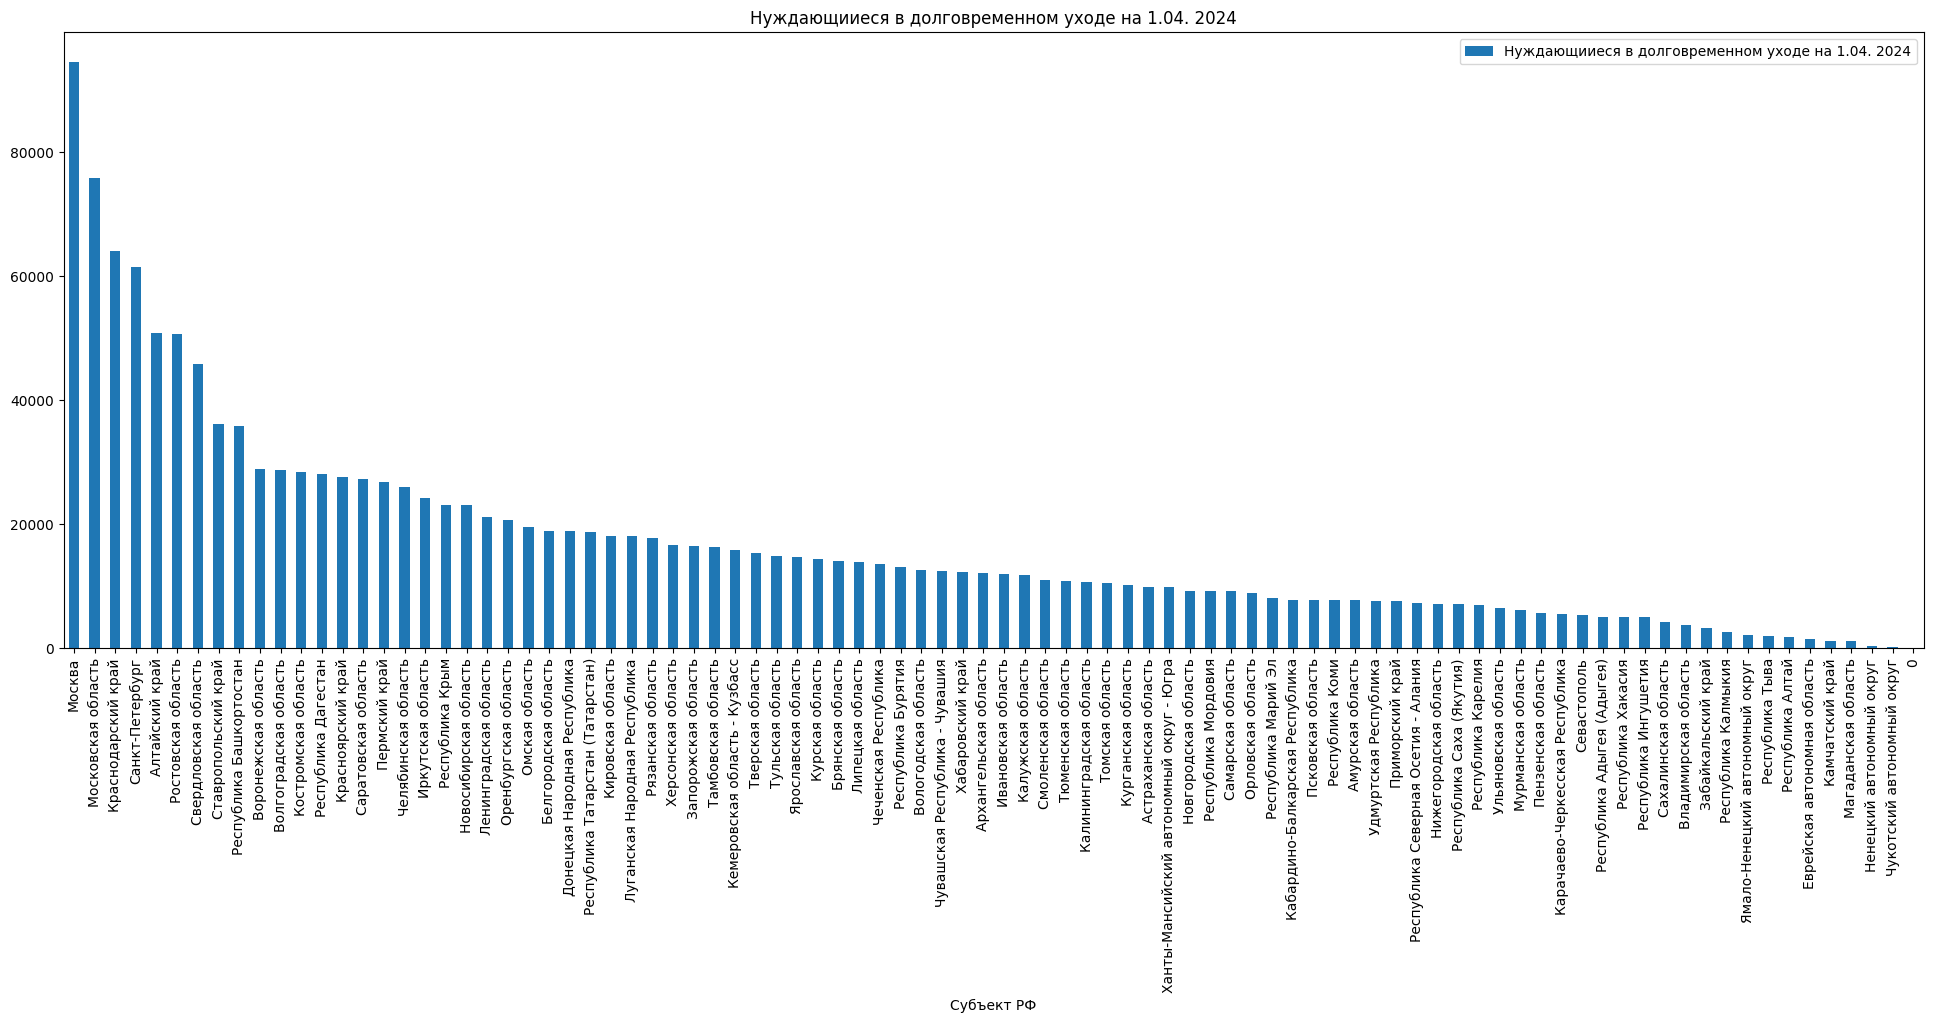

In [ ]:
people = df_people.pivot_table(index= ['Субъект РФ'], values= 'Нуждающииеся в долговременном уходе на 1.04. 2024',  aggfunc= 'sum')

#sorted_p = platform_sales.groupby('total_sales').sum().reset_index()
sorted_p = people.sort_values(by='Нуждающииеся в долговременном уходе на 1.04. 2024', ascending=False)


display(sorted_p.head(5))


#df = df_raw.groupby('class').size()

# Make the plot with pandas
sorted_p.plot(kind='bar', subplots=True, figsize=(24, 8))
plt.title("Нуждающииеся в долговременном уходе на 1.04. 2024")
plt.ylabel("")
plt.show()

,Получающие СДУ 1.04.2024
Субъект РФ,
Москва,80606.0
Ставропольский край,7245.0
Республика Татарстан (Татарстан),6193.0
Тульская область,5649.0
Волгоградская область,5278.0


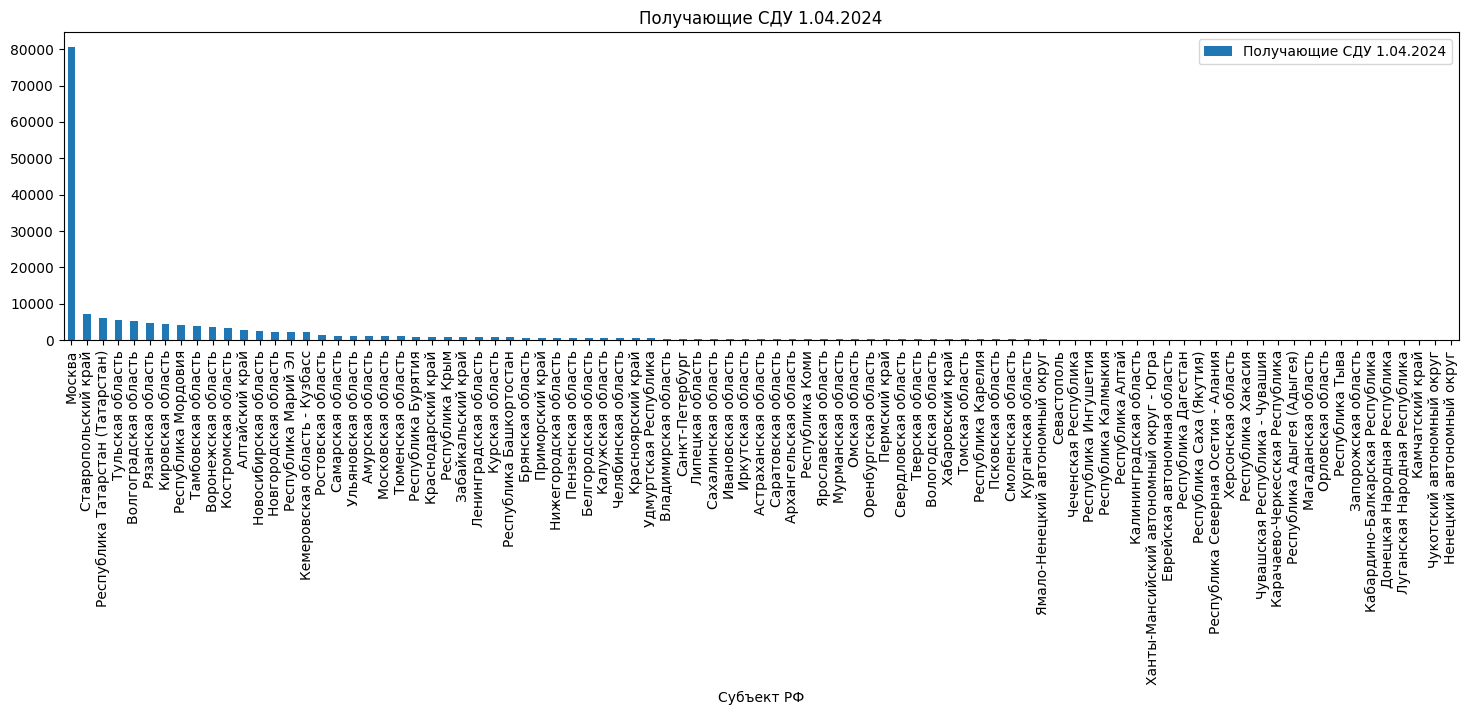

In [19]:


people = df.pivot_table(index= ['Субъект РФ'], values= 'Получающие СДУ 1.04.2024',  aggfunc= 'sum')

#sorted_p = platform_sales.groupby('total_sales').sum().reset_index()
sorted_p = people.sort_values(by='Получающие СДУ 1.04.2024', ascending=False)


display(sorted_p.head(5))


#df = df_raw.groupby('class').size()

# Make the plot with pandas
sorted_p.plot(kind='bar', subplots=True, figsize=(18, 4))
plt.title('Получающие СДУ 1.04.2024')
plt.ylabel("")
plt.show()

In [ ]:
df['Нуждающииеся в долговременном уходе на 1.01. 2022'].sum()


453525.0

In [ ]:
df['Нуждающииеся в долговременном уходе на 1.01. 2023'].sum()

575200.0

In [ ]:
df['Нуждающиеся в долговременном уходе на 1.01.2024'].sum()

645955.0

In [ ]:
df['Нуждающииеся в долговременном уходе на 1.04. 2024'].sum()

1493263.0

In [ ]:
df_peple_01_24= df[['Субъект РФ','Нуждающиеся в долговременном уходе на 1.01.2024']]

In [ ]:
df_people_23 = df[['Субъект РФ','Нуждающииеся в долговременном уходе на 1.01. 2023']]
df_people_22 = df[['Субъект РФ','Нуждающииеся в долговременном уходе на 1.01. 2022']]

,"Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %"
Субъект РФ,
Москва,0.521153
Тульская область,0.471276
Ставропольский край,0.417652
Камчатский край,0.252893
Республика Татарстан (Татарстан),0.250328


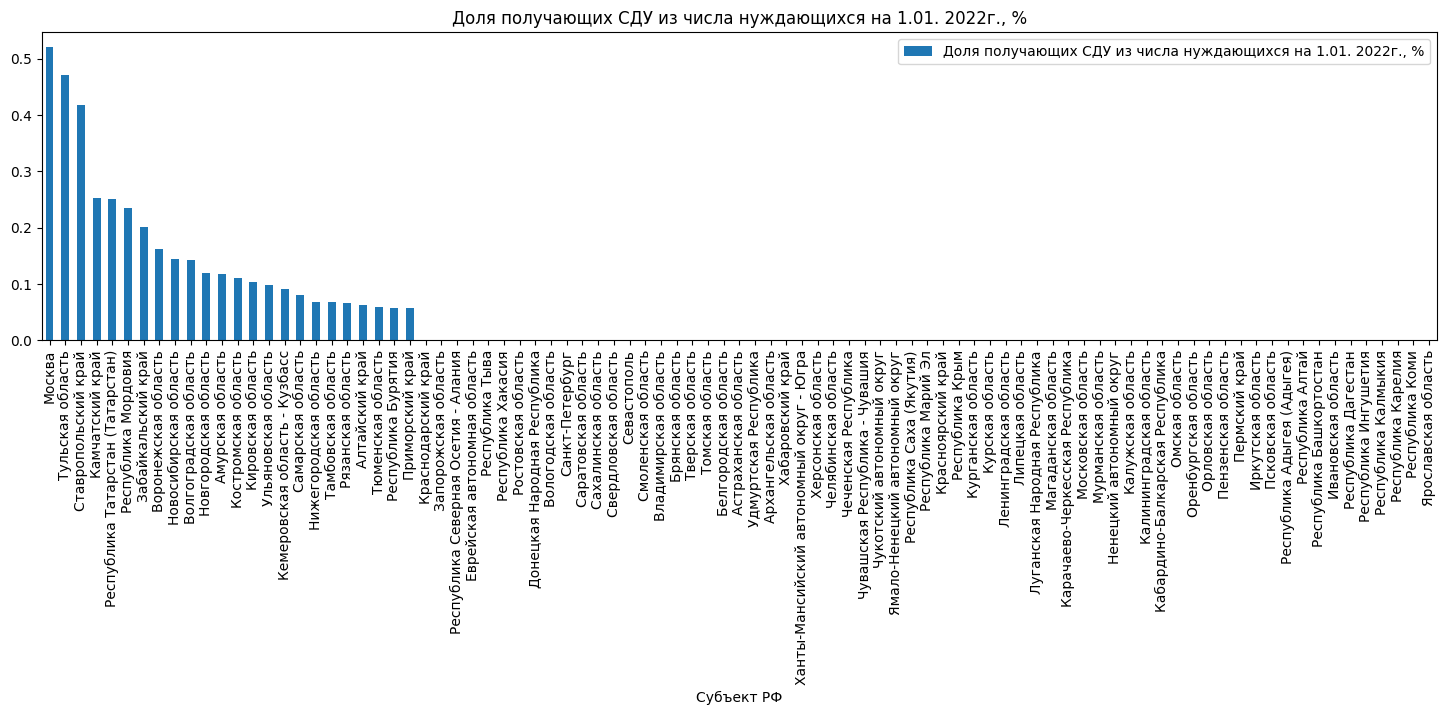

In [18]:
people = df.pivot_table(index= ['Субъект РФ'], values= 'Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %',  aggfunc= 'sum')

#sorted_p = platform_sales.groupby('total_sales').sum().reset_index()
sorted_p = people.sort_values(by='Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %', ascending=False)


display(sorted_p.head(5))


#df = df_raw.groupby('class').size()

# Make the plot with pandas
sorted_p.plot(kind='bar', subplots=True, figsize=(18, 4))
plt.title('Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %')
plt.ylabel("")
plt.show()

,Доля получающих СДУ из числа нуждающихся на 1.04.2024
Субъект РФ,
Москва,0.851757
Республика Мордовия,0.467836
Тульская область,0.380020
Чукотский автономный округ,0.369004
Республика Татарстан (Татарстан),0.331053


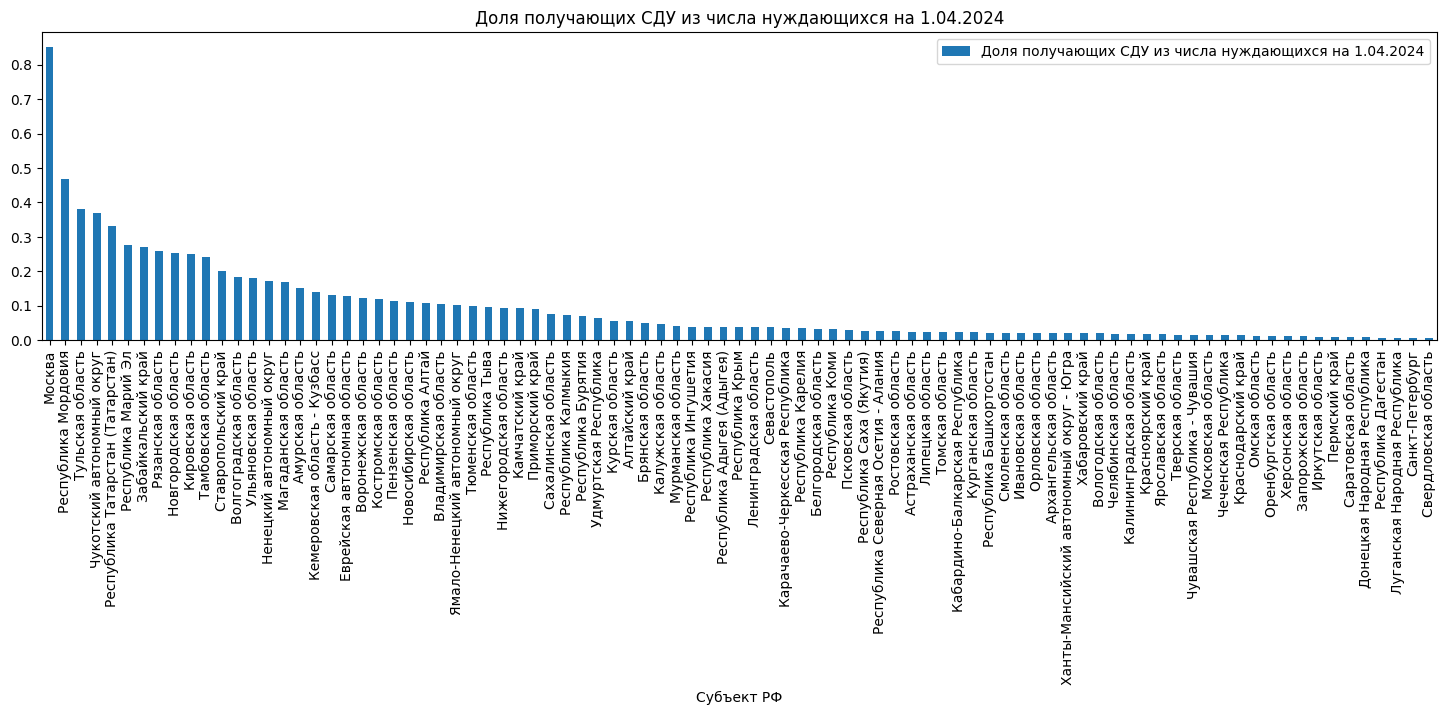

In [20]:
people = df.pivot_table(index= ['Субъект РФ'], values= 'Доля получающих СДУ из числа нуждающихся на 1.04.2024',  aggfunc= 'sum')

#sorted_p = platform_sales.groupby('total_sales').sum().reset_index()
sorted_p = people.sort_values(by='Доля получающих СДУ из числа нуждающихся на 1.04.2024', ascending=False)


display(sorted_p.head(5))


#df = df_raw.groupby('class').size()

# Make the plot with pandas
sorted_p.plot(kind='bar', subplots=True, figsize=(18, 4))
plt.title('Доля получающих СДУ из числа нуждающихся на 1.04.2024')
plt.ylabel("")
plt.show()

## 4. Распределение количества людей нуждающихся в долговременном уходе в долевом выражении за период 2022-24 годы


In [ ]:
df_share = df[['Доля получающих СДУ из числа нуждающихся на 1.04.2024', 'Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %',
               'Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %', 'Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %']]

In [ ]:
df_share.describe()

,Доля получающих СДУ из числа нуждающихся на 1.04.2024,"Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %","Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %","Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %"
count,90.000000,90.000000,90.000000,90.000000
mean,0.091336,0.063443,0.050658,0.043978
std,0.126201,0.122279,0.106286,0.099845
min,0.000000,0.000000,0.000000,0.000000
25%,0.019809,0.000000,0.000000,0.000000
50%,0.037955,0.000000,0.000000,0.000000
75%,0.112663,0.096987,0.073017,0.057999
max,0.851757,0.827647,0.765380,0.521153


Text(0.5, 1.0, 'Распределение значений долей получающих СДУ из числа нуждающихся: по осям Y - количество субъекьтов, X - Доля в % ')

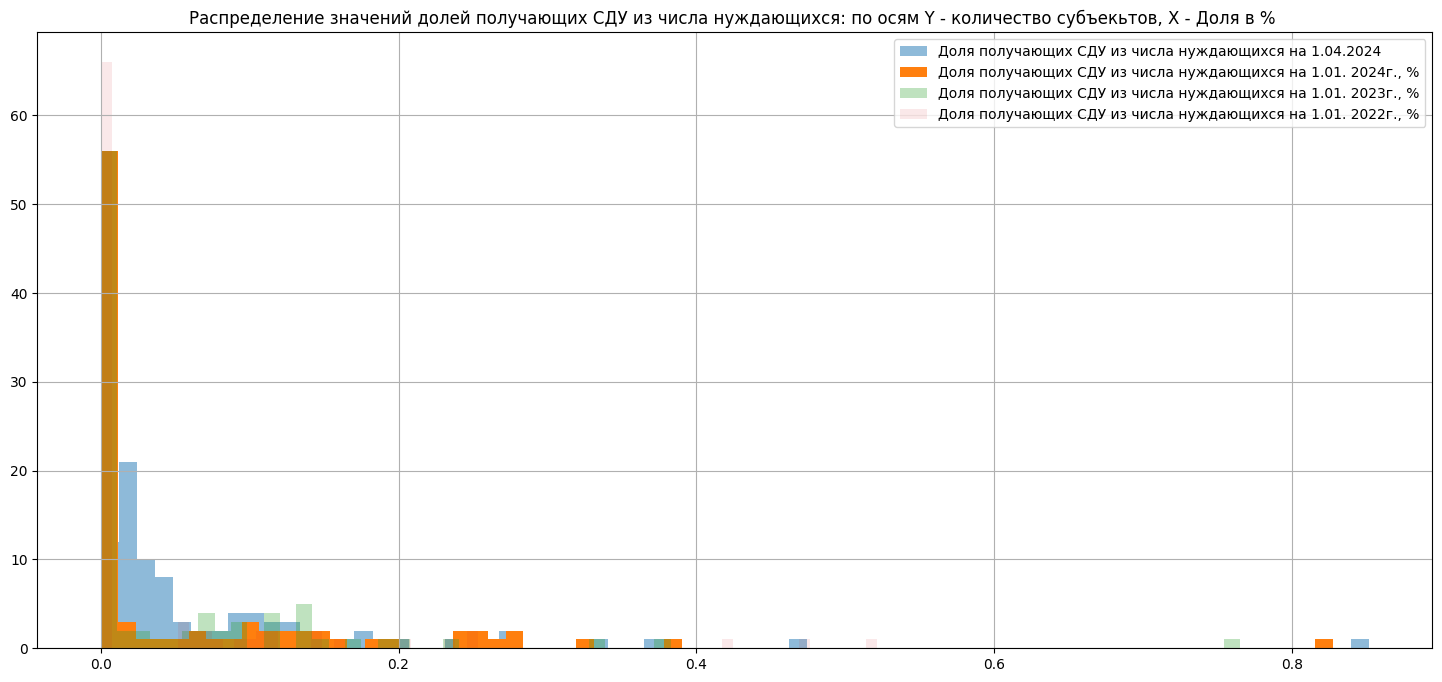

In [ ]:
df['Доля получающих СДУ из числа нуждающихся на 1.04.2024'].hist(bins=70, alpha =0.5, figsize = (18,8), legend = 'Доля получающих СДУ из числа нуждающихся на 1.04.2024' )
df['Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %'].hist(bins =70, alpha =1, legend = 'Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %')
df['Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %'].hist(bins=70, alpha=0.3, legend = 'Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %')
df['Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %'].hist(bins=70, alpha=0.1, legend = 'Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %')
plt.title('Распределение значений долей получающих СДУ из числа нуждающихся: по осям Y - количество субъекьтов, X - Доля в % ')


Вывод: заметна тенеденция на общее увеличение доли в 2024 году. В 2022-23гг было много регионов где доля получающих соц. услуги из числа нуждающихся была равна нулю. В 2024 году распределение значение изменилось в сторону нормального распределения.

### Распределение значений по численности людей получивших СДУ за 2022 - 2024 годы


In [ ]:
df_people_got = df[['Субъект РФ', 'Получающие СДУ 1.04.2024', 'Численность граждан, получающих социальные услуги по уходу на 1.01.2024', 'Получающие СДУ 1.01.2023',
                    'Получающие СДУ 1.01.2022']]

In [ ]:
df_people_got.describe()

,Получающие СДУ 1.04.2024,"Численность граждан, получающих социальные услуги по уходу на 1.01.2024",Получающие СДУ 1.01.2023,Получающие СДУ 1.01.2022
count,90.000000,90.000000,90.000000,90.000000
mean,1902.433333,1714.944444,1512.333333,1207.988889
std,8527.335667,8556.152081,8561.596937,6366.635473
min,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,0.000000,0.000000
50%,250.000000,0.000000,0.000000,0.000000
75%,921.750000,772.750000,501.500000,375.750000
max,80606.000000,80564.000000,80753.000000,59572.000000


Text(0.5, 1.0, 'Распределение значений по численности получающих СДУ из числа нуждающихся: по осям Y - количество субъектов, X - численность (за исключением Москвы) ')

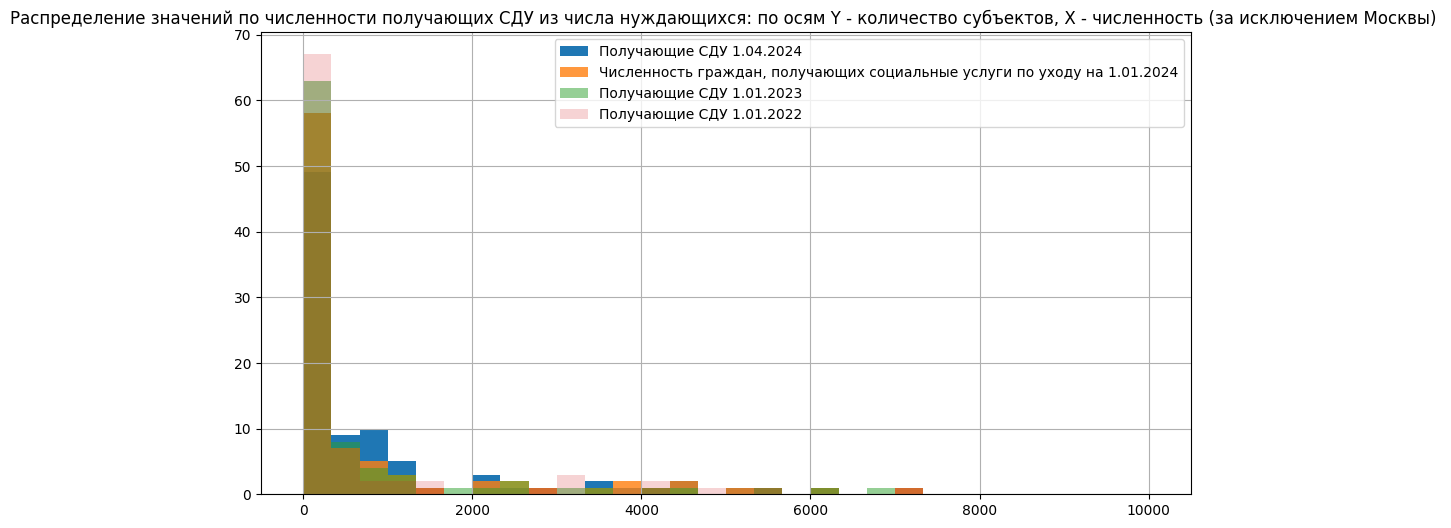

In [ ]:
df_people_got  ['Получающие СДУ 1.04.2024'].hist(bins=30, alpha =1, figsize = (12,6), legend = 'Получившие соци услуги на 1.04. 2024', range = (0, 10000) )
df_people_got  ['Численность граждан, получающих социальные услуги по уходу на 1.01.2024'].hist(bins=30, alpha =0.8,  legend = 'Получившие соци услуги на 1.01. 2024', range =(0, 10000) )
df_people_got  ['Получающие СДУ 1.01.2023'].hist(bins=30, alpha =0.5, legend = 'Получившие соци услуги на 1.04. 2022', range = (0, 10000) )
df_people_got  ['Получающие СДУ 1.01.2022'].hist(bins=30, alpha =0.2, legend = 'Получившие соци услуги на 1.04. 2022', range = (0, 10000))
plt.title('Распределение значений по численности получающих СДУ из числа нуждающихся: по осям Y - количество субъектов, X - численность (за исключением Москвы) ')


Text(0.5, 1.0, 'Распределение значений числа людей, получивших социальную услугу на 01.01.2022 по субъектам (за исключением Москвы) ')

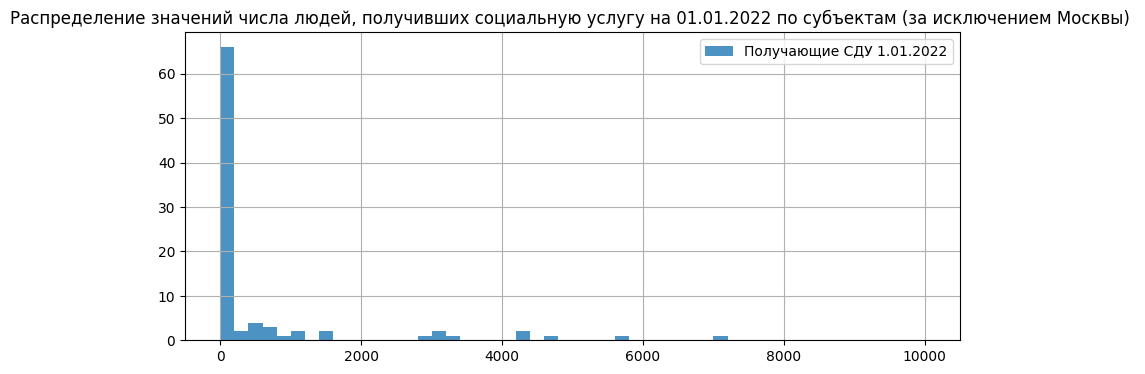

In [ ]:
df  ['Получающие СДУ 1.01.2022'].hist(bins=50, alpha =0.8,  legend = 'Получившие соци услуги на 1.01. 2022', range = (0,10000), figsize = (10,4) )
plt.title('Распределение значений числа людей, получивших социальную услугу на 01.01.2022 по субъектам (за исключением Москвы) ')

Text(0.5, 1.0, 'Распределение числа людей получивших социальную услугу на 01.04.2024 по субъектам (за исключением Москвы) ')

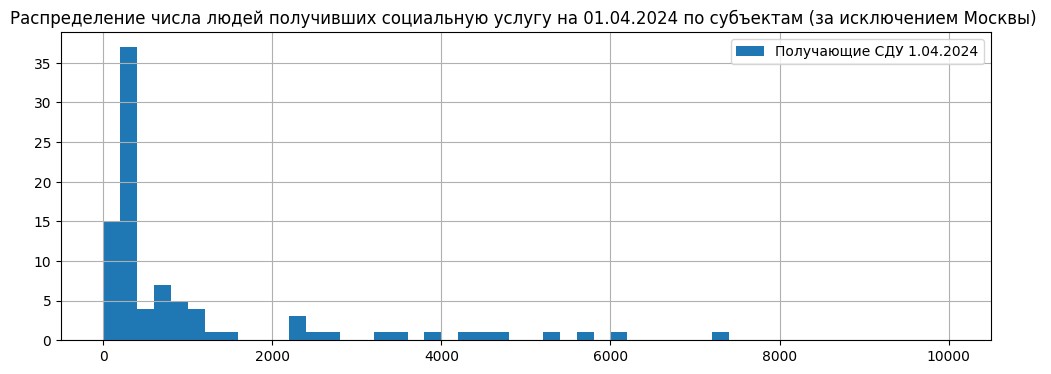

In [ ]:
df_people_got  ['Получающие СДУ 1.04.2024'].hist(bins=50, alpha =1, figsize = (12,4), legend = 'Получившие соци услуги на 1.04. 2024 (без Москвы)', range =(0,10000))
plt.title('Распределение числа людей получивших социальную услугу на 01.04.2024 по субъектам (за исключением Москвы) ')

Вывод: та же тенеденция на изменение распределения значений численности людей получивших соц. услугу в сторону нормального распределения, засчет получения социальной услуги большего количества людей в 2024 году

## 5. Изучение зависимости доли получивших социальную услугу от численности Субъекта РФ.

### Формируем нулевую гипотезу, что доля получивших социальную услугу имеет линейную зависимость от размера региона по числу проживающих. Альтернативная гипотеза - связь отсутвует.

### Далее в результате исследований постраемся либо подтвердить либо провергнуть.

### Смотрим 2022 год:

Text(0.5, 1.0, 'Зависимость доли получающих СДУ из числа нужддающихся к численности Субъекта на 1 января 2022 года')

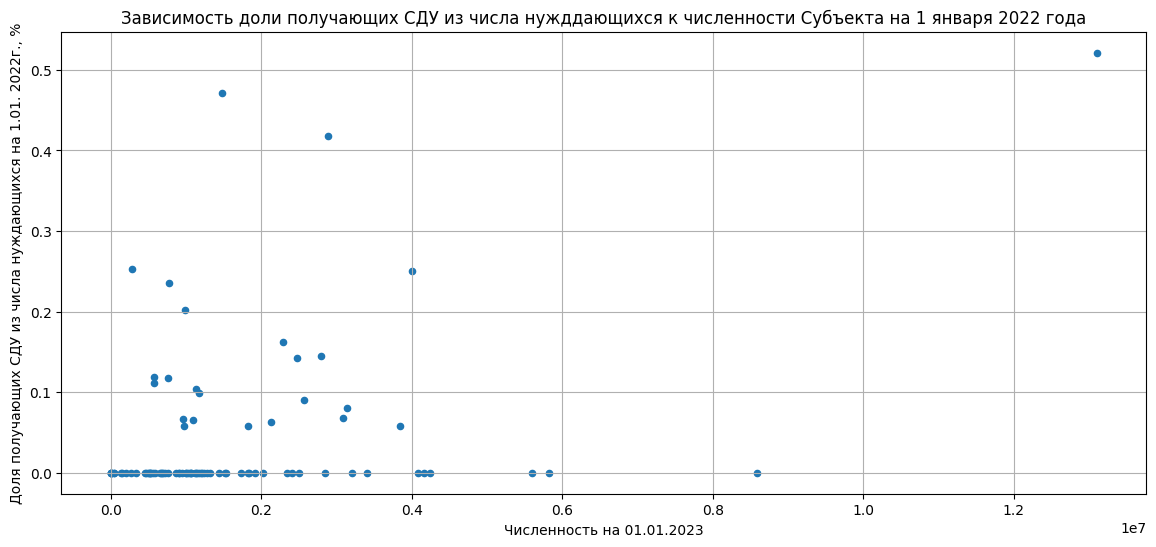

In [ ]:
df.plot(x = 'Численность на 01.01.2023', y = 'Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %', kind ='scatter', sharex=False, grid=True, alpha=1.0, figsize=(14,6)  )
plt.title('Зависимость доли получающих СДУ из числа нужддающихся к численности Субъекта на 1 января 2022 года')


In [ ]:
print('Коэффициент Пирсона равен', df['Численность на 01.01.2023'].corr(df['Доля получающих СДУ из числа нуждающихся на 1.01. 2022г., %']))

Коэффициент Пирсона равен 0.3905341238559654


Вывод: Коэффициент корреляции Пирсона равен 0.4 , что указывает на слабую зависимость доли получающих СДУ к числу проживающих в субъектк РФ людей

### Смотрим 2023 год

Text(0.5, 1.0, 'Зависимость доли получающих СДУ из числа нуждающихся к численности Субъекта на 1 января 2023 года')

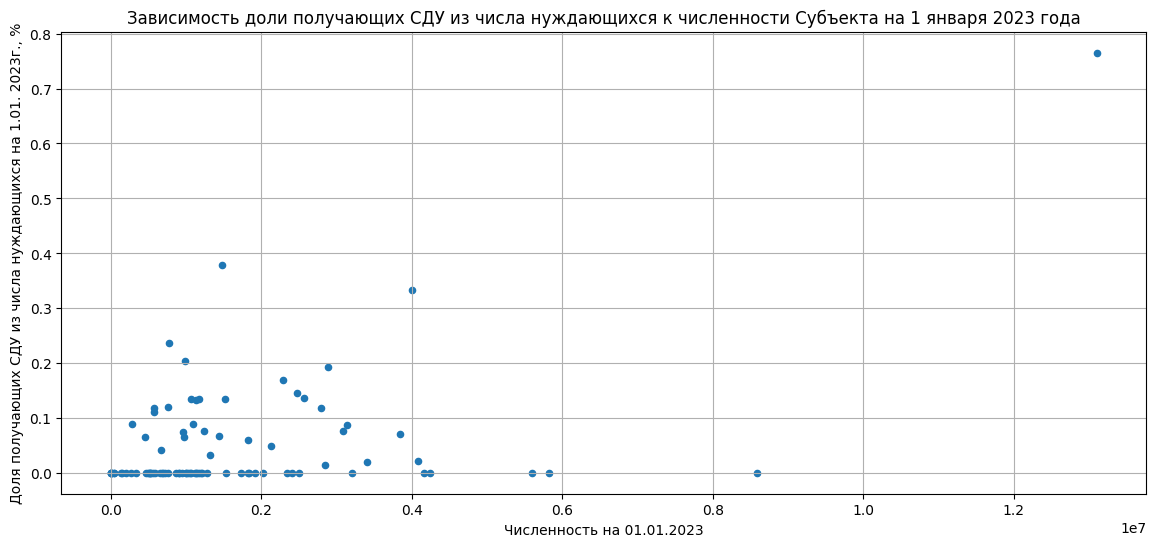

In [ ]:
df.plot(x = 'Численность на 01.01.2023', y = 'Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %', kind ='scatter', sharex=False, grid=True, alpha=1.0, figsize=(14,6)  )
plt.title('Зависимость доли получающих СДУ из числа нуждающихся к численности Субъекта на 1 января 2023 года')


In [ ]:
print('Коэффициент Пирсона равен', df['Численность на 01.01.2023'].corr(df['Доля получающих СДУ из числа нуждающихся на 1.01. 2023г., %']))

Коэффициент Пирсона равен 0.5225490227588332


Вывод: в 2023 заметно увеличение линейной зависимости показателей. Коэф. Пирсона равент 0.52. Возможно это связано с наличием в выборке большого количества регионов, где доля получающих СДУ равна нулю.

### Смотрим на изменения в 2024 году

Text(0.5, 1.0, 'Зависимость доли получающих СДУ из числа нуждающихся к численности Субъекта на 1 января 2024 года')

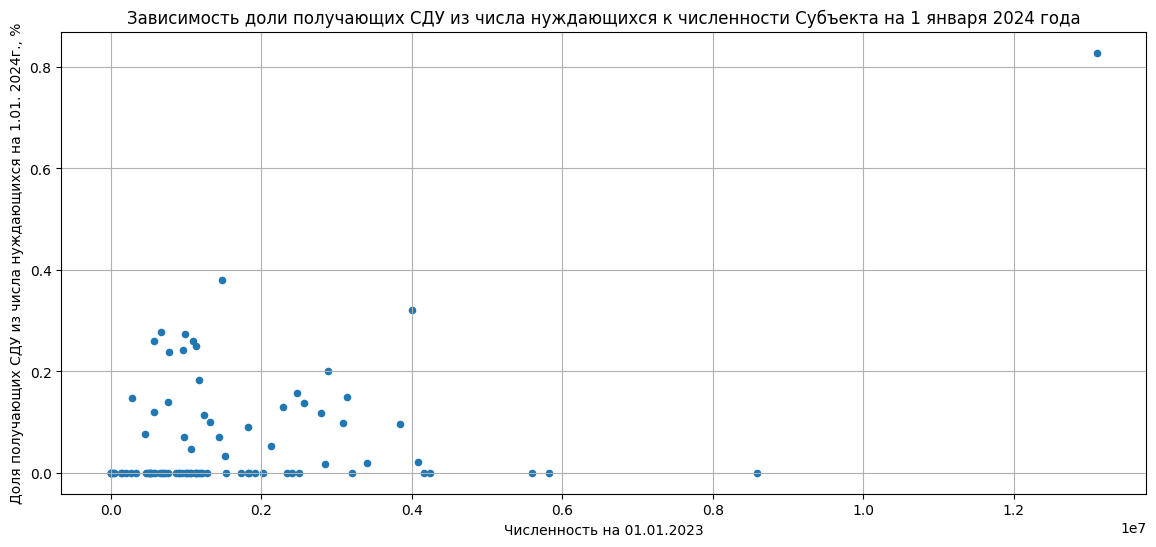

In [ ]:
df.plot(x = 'Численность на 01.01.2023', y = 'Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %', kind ='scatter', sharex=False, grid=True, alpha=1.0, figsize=(14,6)  )
plt.title('Зависимость доли получающих СДУ из числа нуждающихся к численности Субъекта на 1 января 2024 года')

In [ ]:
print('Коэффициент линейной зависимости Пирсона равен', df['Численность на 01.01.2023'].corr(df['Доля получающих СДУ из числа нуждающихся на 1.01. 2024г., %']))

Коэффициент линейной зависимости Пирсона равен 0.45625716909577796


Вывод: Зависимость присутсвуют. Тем не менее наблюдается незначительное сниежение линейной связи

### Смотрим измененеия линейной зависимости в 2024 году

Text(0.5, 1.0, 'Зависимость доли получающих СДУ из числа нужддающихся к численности Субъекта на 1 апреля 2024 года')

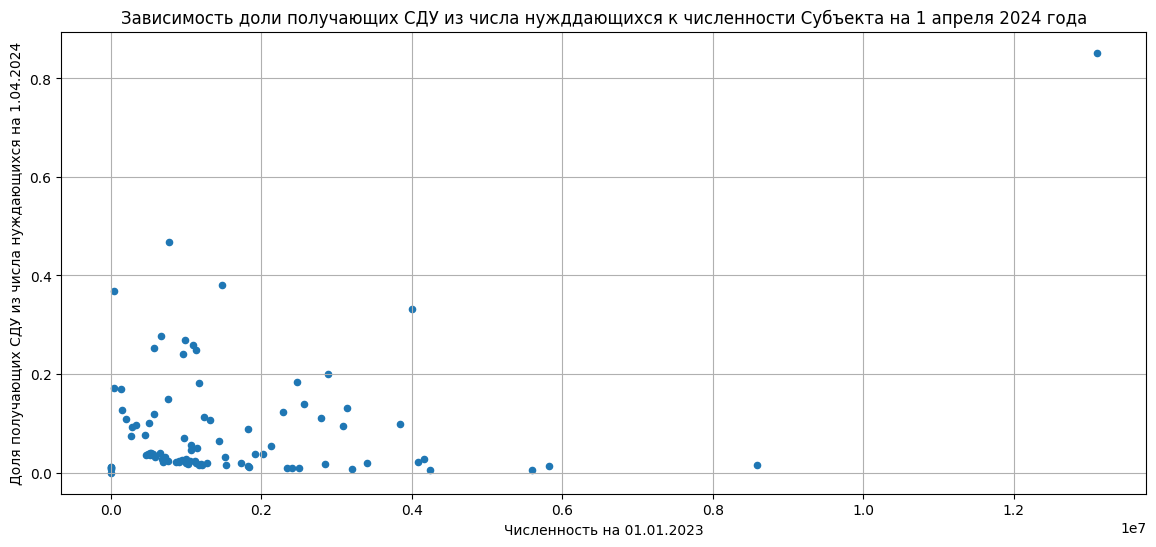

In [ ]:
df.plot(x = 'Численность на 01.01.2023', y = 'Доля получающих СДУ из числа нуждающихся на 1.04.2024', kind ='scatter', sharex=False, grid=True, alpha=1.0, figsize=(14,6)  )
plt.title('Зависимость доли получающих СДУ из числа нужддающихся к численности Субъекта на 1 апреля 2024 года')

In [ ]:
print('Коэффициент Пирсона равен', df['Численность на 01.01.2023'].corr(df['Доля получающих СДУ из числа нуждающихся на 1.04.2024']))

Коэффициент Пирсона равен 0.3458658879641508


 Вывод: Линейная зависимость вернулась на перовачальный уровень. Коэф. Пирсона составляет 0.34 что указывает на слабую зависимость. Заметно изменение распределения значений в выборке в сторону увеличения доли получивших в тех регионах, где раньше это значение было нулевым

Общий вывод: Проведенный анализ данных указывает на отсутствие линейной зависимости между показателями численности региона и долей людей, получивших социальную услугу из числа нуждающихся в рамках СДУ. Коэффициент линейной корреляции Пирсона в апреле 2024 года составил 0.35, что дает основание отклонить нулевую гипотезу и принять альтернативную - связи между этими показателями нет. Также наблюдается динамика на изменения распределения значений по доле получающих СДУ в сторону нормального, засчет того что в 2024 году в регионах с нулевым показателем произошли изменения в сторону увеличения граждан, котрым была оказана социальная услуга по долговременному уходу.